In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
sdss_data=pd.read_csv("C:/Users/hp/Desktop/Dataset/skyserver.csv")

In [3]:
sdss_data.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'plate', 'fiberid'], axis=1, inplace=True)

In [4]:
sdss_data.head(5)

,ra,dec,u,g,r,i,z,class,redshift,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,54922


In [5]:
sdss_data.describe()

,ra,dec,u,g,r,i,z,redshift,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854,57481.000000


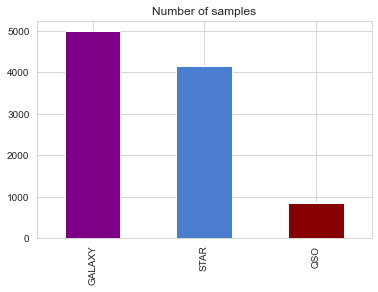

In [6]:
sdss_data['class'].value_counts()

star_color='#4a7dce'
galaxy_color='#7e0087'
qso_color='#870000'

array_color=[star_color, galaxy_color, qso_color]

sdss_data['class'].value_counts().plot(kind='bar',title='Number of samples', color=['#7e0087','#4a7dce','#870000']);

Correlation Matrix

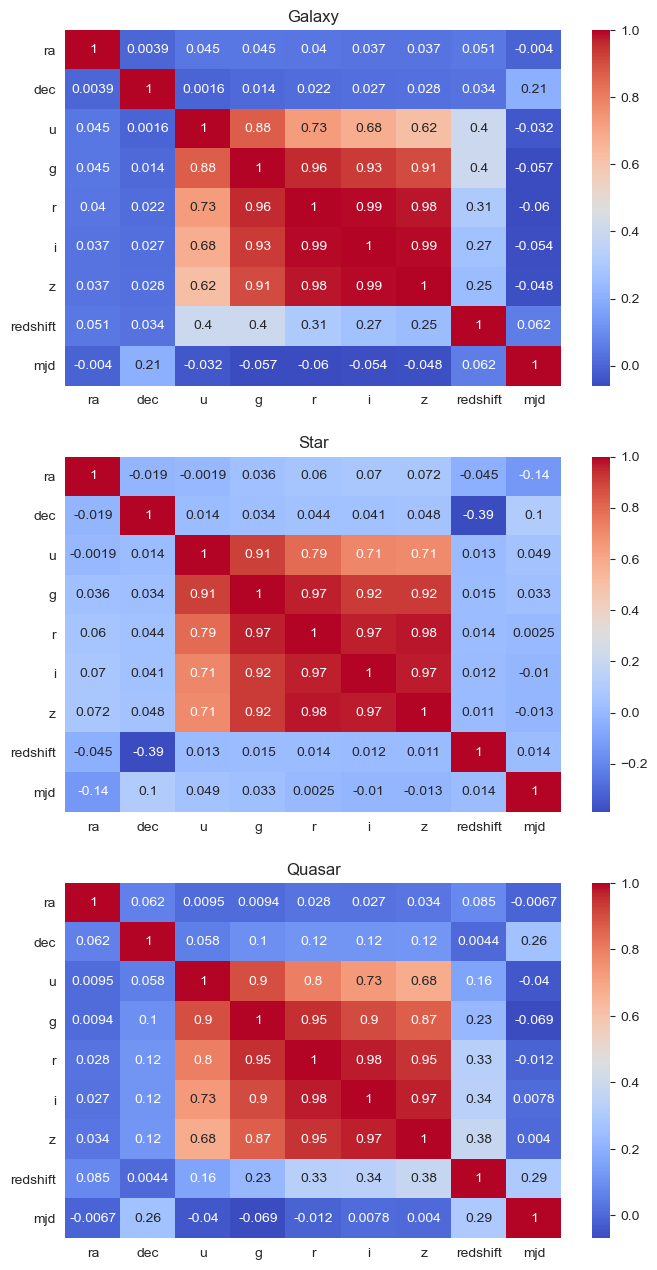

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(8, 16))
fig.set_dpi(100)
ax = sns.heatmap(sdss_data[sdss_data['class']=='GALAXY'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), ax = axes[0], cmap='coolwarm', annot=True)
ax.set_title('Galaxy')
ax = sns.heatmap(sdss_data[sdss_data['class']=='STAR'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), ax = axes[1], cmap='coolwarm', annot=True)
ax.set_title('Star')
ax = sns.heatmap(sdss_data[sdss_data['class']=='QSO'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), ax = axes[2], cmap='coolwarm', annot=True)
ax = ax.set_title('Quasar')

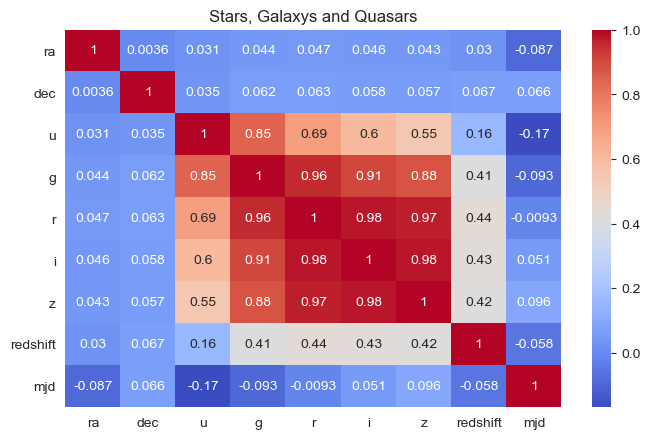

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 5))
fig.set_dpi(100)
ax = sns.heatmap(sdss_data[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'mjd']].corr(), cmap='coolwarm', annot=True)
ax.set_title('Stars, Galaxys and Quasars');


The average, minimum and maximum of the Thuan-Gunn magnitudes are observed in search of some particularity.

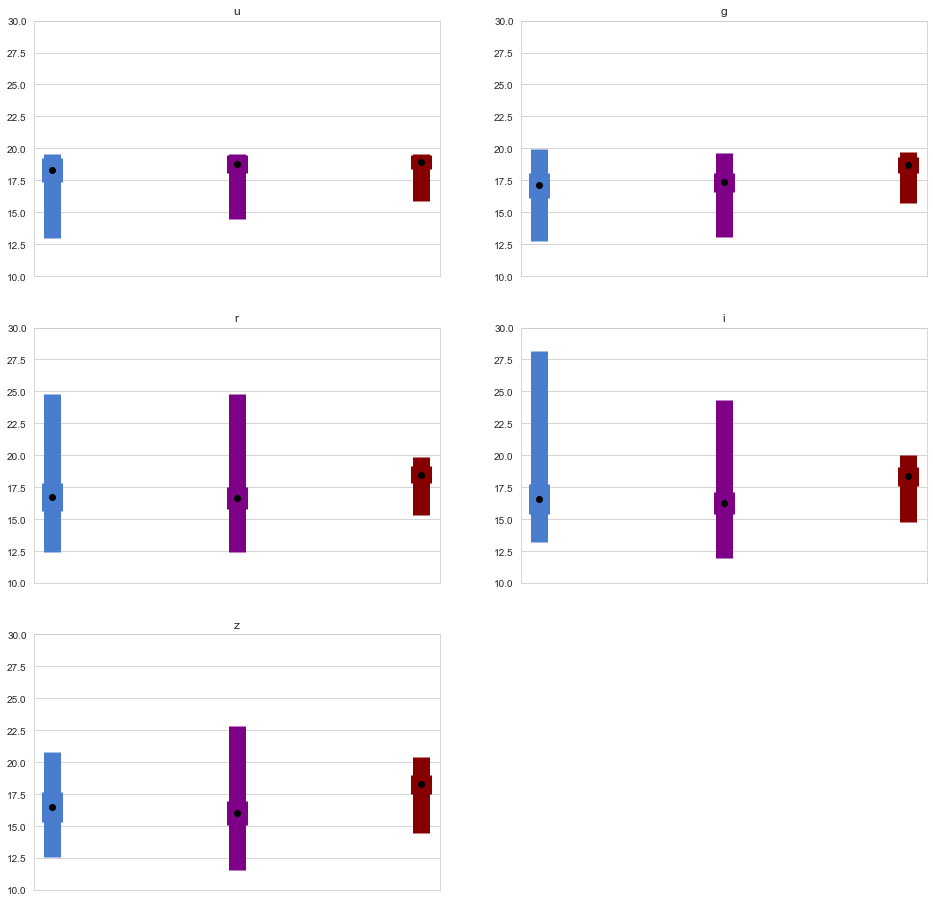

In [10]:
fig=plt.figure(1,figsize=(16,16))

ugriznames_array=['u','g','r','i','z']

for i in range(5):

    ax = fig.add_subplot(3, 2, i+1)
    ax.set_ylim(10,30)
    ax.xaxis.grid(False)
   
    u_errorbar= [sdss_data[sdss_data['class']=='STAR'][ugriznames_array[i]],
                 sdss_data[sdss_data['class']=='GALAXY'][ugriznames_array[i]],
                 sdss_data[sdss_data['class']=='QSO'][ugriznames_array[i]]]

    x=[0,1,2];

    mins = np.array([u_errorbar[0].min(0),u_errorbar[1].min(0),u_errorbar[2].min(0)])
    maxes = np.array([u_errorbar[0].max(0),u_errorbar[1].max(0),u_errorbar[2].max(0)])
    means = np.array([u_errorbar[0].mean(0),u_errorbar[1].mean(0),u_errorbar[2].mean(0)])
    std = np.array([u_errorbar[0].std(0),u_errorbar[1].std(0),u_errorbar[2].std(0)])

    # creating stacked errorbars:
    plt.errorbar(np.arange(3), means, std, fmt='ok', linewidth=21, ecolor=array_color)
    plt.errorbar(np.arange(3), means, [means - mins, maxes - means],
                 fmt='.k', ecolor=array_color, lw=17)
    plt.tick_params( axis='x', which='both', bottom=False,top=False,labelbottom=False)

    plt.title(ugriznames_array[i])

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
features = ['u','g','r', 'i', 'z'];

# Normalization of the features
x = sdss_data.loc[:, features].values
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

prinComp = pca.fit_transform(x)

ugriz_pca_Df = pd.DataFrame(data = prinComp, columns = ['ugriz_pca1','ugriz_pca2'])

sdss_finaldata=pd.concat([ sdss_data[['ra']], sdss_data[['dec']], ugriz_pca_Df, sdss_data[['redshift']], sdss_data[['class']], sdss_data[['mjd']] ], axis = 1)

In [13]:
sdss_finaldata.head()

,ra,dec,ugriz_pca1,ugriz_pca2,redshift,class,mjd
0,183.531326,0.089693,-1.063661,-1.605619,-0.000009,STAR,54922
1,183.598371,0.135285,-0.181554,-0.070793,-0.000055,STAR,51615
2,183.680207,0.126185,1.375966,-0.574447,0.123111,GALAXY,52023
3,183.870529,0.049911,-1.504058,0.574015,-0.000111,STAR,54922
4,183.883288,0.102557,-1.147961,1.290891,0.000590,STAR,54922


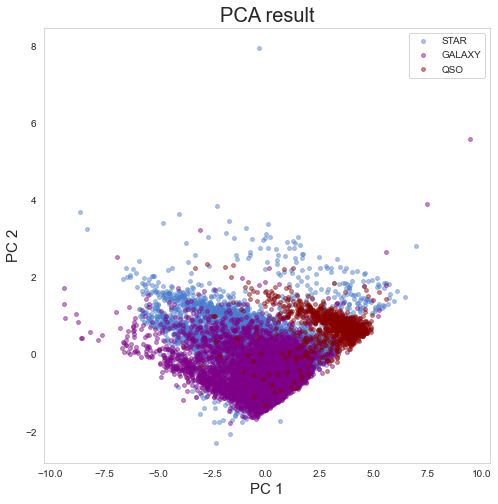

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PCA result', fontsize = 20)

clases = ['STAR', 'GALAXY', 'QSO']
colors = [star_color, galaxy_color, qso_color]
for clases, color in zip(clases,colors):
    indicesToKeep = sdss_finaldata['class'] == clases
    ax.scatter(ugriz_pca_Df.loc[indicesToKeep, 'ugriz_pca1'], ugriz_pca_Df.loc[indicesToKeep, 'ugriz_pca2']
               , c = color, s = 15,alpha=0.45)
ax.legend(['STAR', 'GALAXY', 'QSO'])
ax.grid()

# Classification

In [15]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score
import time

In [16]:
# Replacing categorical classes with numbers
d=pd.DataFrame(sdss_finaldata)


class_num=pd.DataFrame(LabelEncoder().fit_transform(d['class']), columns=['class'])
d.drop(['class'], axis=1, inplace=True)
names=list(d)

In [17]:
#Normalizing the data for better conditioning of the problem

scaler = MinMaxScaler()
d=pd.DataFrame(scaler.fit_transform(d), columns=names)


d=pd.concat([d, class_num], axis=1)

d.head(3)

,ra,dec,ugriz_pca1,ugriz_pca2,redshift,mjd,class
0,0.693832,0.074025,0.441506,0.066876,0.000770,0.566492,2
1,0.694098,0.074642,0.488416,0.216500,0.000762,0.006268,2
2,0.694422,0.074519,0.571244,0.167401,0.023749,0.075385,0


In [18]:
x=d.drop('class',axis=1);
y=d['class']

x_train, x_test, y_train, y_test = train_test_split(d.drop('class',axis=1), d['class'], test_size=0.4)

Logistics Regression

The first iteration of the Logistic Regression gives an accuracy of the 89.28 %
[0=Galaxy 1=Quasar 2=Star]


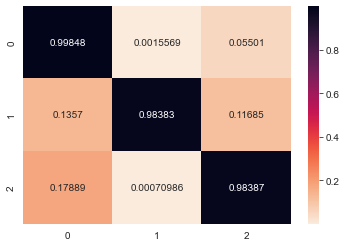

In [20]:
from sklearn import linear_model, datasets

lr = linear_model.LogisticRegression() 

training_start = time.perf_counter()
lr.fit(x_train, y_train)#Training
training_end = time.perf_counter()

predict_start = time.perf_counter()
preds = lr.predict(x_test)#Prediction
predict_end = time.perf_counter()
acc_lreg = (preds == y_test).sum().astype(float) / len(preds)*100

print("The first iteration of the Logistic Regression gives an accuracy of the %3.2f %%" % (acc_lreg))

from numpy import linalg as LA
mc=confusion_matrix(y_test, preds)
mc_norm = mc / np.linalg.norm(mc, axis=1, keepdims=True)
sns.heatmap(pd.DataFrame(mc_norm), cmap=sns.cm.rocket_r, annot=True, fmt='.5g',);

print("[0=Galaxy 1=Quasar 2=Star]")

In [21]:
lr_train_t=training_end-training_start;
lr_predict_t=predict_end-predict_start;

scores = cross_val_score(lr, x, y, cv=10, scoring = "accuracy")
score_lr=scores.mean()
print("The 10 cross validations of Logistic Regression have had an average success rate of  %3.2f %%" %(score_lr*100))
std_lr=scores.std()
print("..and a standar deviation of %8.5f" %(std_lr))

The 10 cross validations of Logistic Regression have had an average success rate of  89.21 %
..and a standar deviation of  0.02250


K-Nearest Neighbours

The first iteration of the K-Nearest Neighbours gives an accuracy of the 90.92 %
[0=Galaxy 1=Quasar 2=Star]


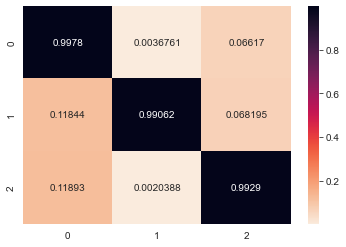

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

training_start = time.perf_counter()
knn.fit(x_train, y_train)
training_end = time.perf_counter()

predict_start = time.perf_counter()
preds = knn.predict(x_test)
predict_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100

print("The first iteration of the K-Nearest Neighbours gives an accuracy of the %3.2f %%" % (acc_knn))



mc=confusion_matrix(y_test, preds)
mc_norm = mc / np.linalg.norm(mc, axis=1, keepdims=True)
sns.heatmap(pd.DataFrame(mc_norm), cmap=sns.cm.rocket_r, annot=True, fmt='.5g')


print("[0=Galaxy 1=Quasar 2=Star]")


In [23]:
knn_train_t=training_end-training_start;
knn_predict_t=predict_end-predict_start;

scores = cross_val_score(knn, x, y, cv=10, scoring = "accuracy")
score_knn=scores.mean()
print("The 10 cross validations of K- Nearest Neighbours have had an average success rate of %3.2f %%" %(score_knn*100))
std_knn=scores.std()
print("..and a standar deviation of %8.5f" %(std_knn))


The 10 cross validations of K- Nearest Neighbours have had an average success rate of 91.38 %
..and a standar deviation of  0.01399


Naive-bayes

The first iteration of the naive Bayes gives an accuracy of the 98.12 %


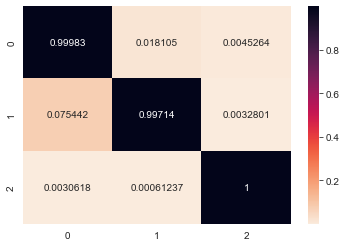

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

training_start = time.perf_counter()
gnb.fit(x_train, y_train)
training_end = time.perf_counter()

predict_start=time.perf_counter()
preds = gnb.predict(x_test)
predict_end = time.perf_counter()
acc_gnb = (preds == y_test).sum().astype(float) / len(preds)*100


print("The first iteration of the naive Bayes gives an accuracy of the %3.2f %%" % (acc_gnb))


mc=confusion_matrix(y_test, preds)
mc_norm = mc / np.linalg.norm(mc, axis=1, keepdims=True)
sns.heatmap(pd.DataFrame(mc_norm), cmap=sns.cm.rocket_r, annot=True, fmt='.5g');

In [25]:
gnb_train_t=training_end-training_start;
gnb_predict_t=predict_end-predict_start;

scores = cross_val_score(gnb, x, y, cv=10, scoring = "accuracy")
score_gnb=scores.mean()
print("The 10 cross validations of naive Bayes have had an average success rate of %3.2f %%" %(score_gnb*100))
std_gnb=scores.std()
print("..and a standard deviation of %8.6f" %(std_gnb))

The 10 cross validations of naive Bayes have had an average success rate of 98.22 %
..and a standard deviation of 0.009600


Random Forest

The first iteration of the Random Forest gives an accuracy of the 98.78 %


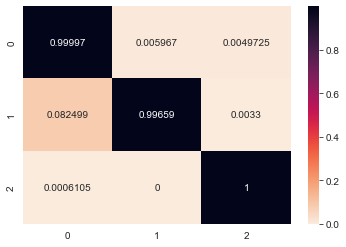

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)

training_start = time.perf_counter()
rfc.fit(x_train, y_train)
training_end = time.perf_counter()

predict_start=time.perf_counter()
preds = rfc.predict(x_test)
predict_end = time.perf_counter()

acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100


print("The first iteration of the Random Forest gives an accuracy of the %3.2f %%" % (acc_rfc))


mc=confusion_matrix(y_test, preds)
mc_norm = mc / np.linalg.norm(mc, axis=1, keepdims=True)
sns.heatmap(pd.DataFrame(mc_norm), cmap=sns.cm.rocket_r, annot=True, fmt='.5g');

In [27]:
rfc_train_t=training_end-training_start;
rfc_predict_t=predict_end-predict_start;

scores = cross_val_score(rfc, x, y, cv=10, scoring = "accuracy")
score_rfc=scores.mean()
print("The 10 cross validations of Random Forest have had an average success rate of %3.2f" %(score_rfc*100))
std_rfc=scores.std()
print("..and a standar deviation of %8.6f" %(std_rfc))

The 10 cross validations of Random Forest have had an average success rate of 98.76
..and a standar deviation of 0.003072


# conclusion

Random Forest scores the best accuracy so we can consider as the best classifier for this problem